### Introduction

In mountaineering, the death zone refers to altitudes above 8,000 m (26,000 ft) where there is insufficient amount of oxygen to sustain human lives. There are a total of 14 mountains in the eight-thousanders located in the Himalaya and Karakoram mountain ranges. Climbers from all over the world are drawn to the beauty of eight-thousanders and venture into the death zone in attempts to summit the peaks each year. While many succeed and celebrate the triumph on the top of the world, some unfortunately never return and many more are injured.

### Research Questions

There are many research areas in Himalayan Database, however here, my research focuses on these "daredevils" who are willing to risk their lives in order to summit the death zone-the eight thousander.

- This brings us to ask. Who are those willing to risk their lives venturing into the death zone?
 - Where do they come from?
 - Do they just climb mountains for a living or are they part of the workforce?

### Dataset

#### Data Sources
The research is primarily based on the [Himalayan Database](https://www.himalayandatabase.com/downloads.html).

- The Himalayan Database is a compilation of records for all expeditions that have climbed in the Nepal Himalaya. The database is based on the expedition archives of Elizabeth Hawley, a longtime journalist based in Kathmandu, and it is supplemented by information gathered from books, alpine journals, and correspondence with Himalayan climbers.

- dataset-`members.csv`

### Import all the libraries we need to 

In [13]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import seaborn as sns
from pywaffle import Waffle
import plotly.express as px

from typing import List
from collections import namedtuple
from datetime import datetime
import math
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
sns.set() 


#plot settings
FIG = namedtuple("FIG", ())
FIG.FONT_SIZE = 12
FIG.TITLE_FONT_SIZE = 15
FIG.TITLE_LINESPACE = 0.9
FIG.W = 15
FIG.H = 5

# https://python-graph-gallery.com/199-matplotlib-style-sheets/
plt.style.use(u"bmh")

### Read csv file from the directory and print the first 5 rows

In [4]:
mem_df = pd.read_csv("members.csv")
mem_df.head()

,expid,membid,peakid,myear,mseason,fname,lname,sex,age,birthdate,yob,calcage,citizen,status,residence,occupation,leader,deputy,bconly,nottobc,support,disabled,hired,sherpa,tibetan,msuccess,mclaimed,mdisputed,msolo,mtraverse,mski,mparapente,mspeed,mhighpt,mperhighpt,msmtdate1,msmtdate2,msmtdate3,msmttime1,msmttime2,msmttime3,mroute1,mroute2,mroute3,mascent1,mascent2,mascent3,mo2used,mo2none,mo2climb,mo2descent,mo2sleep,mo2medical,mo2note,death,deathdate,deathtime,deathtype,deathhgtm,deathclass,msmtbid,msmtterm,hcn,mchksum
0,AMAD78301,1,AMAD,1978,3,Jean Robert,Clemenson,M,0,- -,1938.0,40,France,Leader,"Argentiere, Haute-Savoie, France",Alpine guide,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,- -,- -,- -,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,- -,NaN,0,0,0,1,4,0,2426937
1,AMAD78301,2,AMAD,1978,3,Bernard,Dufour,M,0,- -,1936.0,41,France,Deputy Leader,"Les Houches, Haute-Savoie, France",Alpine guide,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,6000,10/21/78,- -,- -,NaN,NaN,NaN,1,0,0,0,0,0,False,True,False,False,False,False,NaN,False,- -,NaN,0,0,0,1,4,0,2426501
2,AMAD78301,3,AMAD,1978,3,Philippe,Gerard,M,0,- -,1950.0,27,France,Climber,"Troyes, Val-de-Marne, France",Professional photographer,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,- -,- -,- -,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,- -,NaN,0,0,0,1,4,0,2431569
3,AMAD78301,4,AMAD,1978,3,Eric,Lasserre,M,0,- -,1937.0,40,France,Exp Doctor,"Chamonix, Haute-Savoie, France",Physician,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,6000,10/21/78,- -,- -,NaN,NaN,NaN,1,0,0,0,0,0,False,True,False,False,False,False,NaN,False,- -,NaN,0,0,0,1,4,0,2426809
4,AMAD78301,5,AMAD,1978,3,Guy,Peters,M,0,- -,1944.0,34,France,Climber,"Les Houches, Haute-Savoie, France",Alpine guide,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,- -,- -,- -,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,- -,NaN,0,0,0,1,4,0,2429215


#### Next, let's see the shape of our dataset which represents the number of rows and columns

In [12]:
mem_df.shape

(65534, 64)

- After exploring the dataset, I have identified the key features needed to answer my research questions. Most of the data cleaning would take place on the fly. For example, dropping na values.

#### Let's see the popularity of eight-thousanders over time between the popular mount Everest vs all other eight-thousanders from(1905-2019)

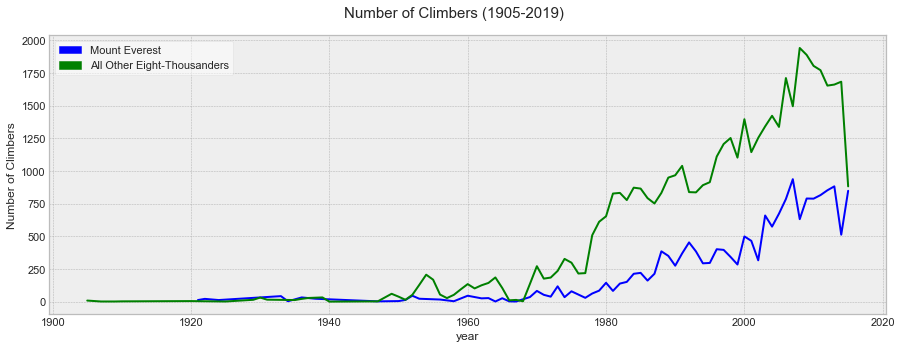

In [16]:
ever_df = mem_df.loc[(mem_df.peakid == "EVER"), ["membid", "myear"]]
others_df = mem_df.loc[(mem_df.peakid != "EVER"), ["membid", "myear"]]
ever_df = round(ever_df.groupby("myear").count()).astype("int")
others_df = round(others_df.groupby("myear").count()).astype("int")


fig, ax = plt.subplots(figsize=(FIG.W, FIG.H))
fig.suptitle("Number of Climbers (1905-2019)", 
             fontsize=FIG.TITLE_FONT_SIZE)
fig.subplots_adjust(top=FIG.TITLE_LINESPACE)

sns.lineplot(x=ever_df.index, y="membid",ax=ax, data=ever_df, markers=True, dashes=False, color="blue")
sns.lineplot(x=others_df.index, y="membid", ax=ax, data=others_df,markers=True, dashes=False, color="green")
ax.set_xlabel("year", fontsize=FIG.FONT_SIZE)
ax.set_ylabel("Number of Climbers", fontsize=FIG.FONT_SIZE)

blue_patch = matplotlib.patches.Patch(color="blue", label="Mount Everest")
green_patch = matplotlib.patches.Patch(color="green", label="All Other Eight-Thousanders")
ax.legend(handles=[blue_patch, green_patch], facecolor="white", edgecolor="#cccccc", framealpha=0.5, fancybox=True)

pass

#### Let's take a look at  the average age of these climbers over time 

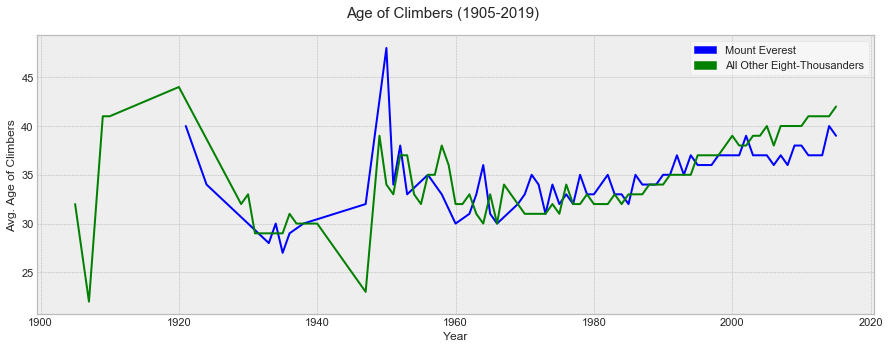

In [20]:
ever_df = mem_df.loc[(mem_df.calcage > 0) & (mem_df.peakid == "EVER"), ["calcage", "myear"]]
others_df = mem_df.loc[(mem_df.calcage > 0) & (mem_df.peakid != "EVER"), ["calcage", "myear"]]
ever_df = round(ever_df.groupby("myear").mean()).astype("int")
others_df = round(others_df.groupby("myear").mean()).astype("int")


fig, ax = plt.subplots(figsize=(FIG.W, FIG.H))
fig.suptitle("Age of Climbers (1905-2019)", 
             fontsize=FIG.TITLE_FONT_SIZE)
fig.subplots_adjust(top=FIG.TITLE_LINESPACE)

sns.lineplot(x=ever_df.index, y="calcage",
             ax=ax, data=ever_df,
             markers=True, dashes=False, color="blue")
sns.lineplot(x=others_df.index, y="calcage",
             ax=ax, data=others_df,
             markers=True, dashes=False, color="green")
ax.set_xlabel("Year", fontsize=FIG.FONT_SIZE)
ax.set_ylabel("Avg. Age of Climbers", fontsize=FIG.FONT_SIZE)

blue_patch = matplotlib.patches.Patch(color="blue", label="Mount Everest")
green_patch = matplotlib.patches.Patch(color="green", label="All Other Eight-Thousanders")
ax.legend(handles=[blue_patch, green_patch], facecolor="white", edgecolor="#cccccc", framealpha=0.5, fancybox=True)

pass

### Using Plotly for an interactive map of Climbers nationality

In [23]:
df = mem_df["citizen"]

df = df.str.split("/")
df = df.apply(lambda l: pd.Series(l)).stack().reset_index(level=1)
df.columns = ["count", "country"]
df = df.groupby("country").count()

fig = px.scatter_geo(df.reset_index(), locations="country", locationmode="country names",
                     hover_name="country", size="count",
                     projection="eckert4", size_max=30, 
                     color_discrete_sequence=["red"])

fig.update_layout(
    title = {
        "text": "Climber Nationality",
        "y": 0.98,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top"},
    margin = dict(l=0, r=0, t=30, b=10),
    font = {
        "size": FIG.TITLE_FONT_SIZE - 2
    })
fig.show()

#### Top ten countries(1095 -2019)

In [24]:
df = mem_df["citizen"]

df = df.str.split("/")
df = df.apply(lambda l: pd.Series(l)).stack().reset_index(level=1)
df.columns = ["count", "country"]
df = df.groupby("country").count()
df.sort_values(by="count", ascending=False, inplace=True)

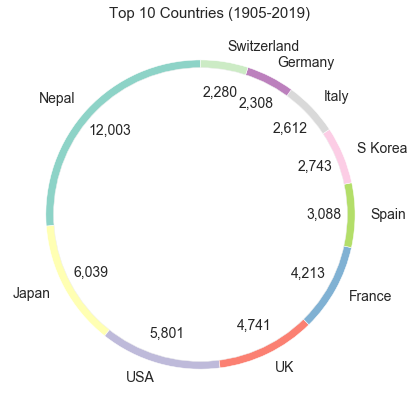

In [26]:
top = df.head(10)

labels = top.index.to_list()
sizes = top["count"].tolist()

colormap = plt.cm.Set3
colors = [colormap(i) for i in np.linspace(0, 0.9, len(labels))]

fig, ax = plt.subplots(figsize=(6, 6))
fig.suptitle("Top 10 Countries (1905-2019)", 
             fontsize=FIG.TITLE_FONT_SIZE)
fig.subplots_adjust(top=FIG.TITLE_LINESPACE)

ax.pie(sizes, colors=colors, labels=labels, autopct=lambda p: "{:,.0f}".format((p/100) * sum(sizes)),
       startangle=90, pctdistance=0.8, wedgeprops=dict(width=1, edgecolor="w"), textprops={"fontsize": 14})

centre_circle = plt.Circle((0,0), 0.95, fc="white")
fig.gca().add_artist(centre_circle)
plt.tight_layout()
pass

#### Top 5 Climbers Occupations between mount Everest vs other eight-thousanders

In [28]:
df = mem_df.loc[:,["occupation", "peakid"]]
df.dropna(inplace=True)

df["Mountain"] = "Mount Everest"
df.loc[df.peakid != "EVER", "Mountain"] = "Other Eight-Thousanders"

def get_jobs(df: pd.DataFrame, top: int = 5) -> pd.Series:
    return df.occupation.value_counts().sort_values(ascending=False)[0:top]
df.groupby("Mountain").apply(get_jobs, 5)

Mountain                             
Mount Everest            Alpine guide    1229
                         Physician        533
                         Alpinist         230
                         Student          224
                         Engineer         199
Other Eight-Thousanders  Alpine guide    3899
                         Physician       1522
                         Engineer        1162
                         Student          674
                         Alpinist         508
Name: occupation, dtype: int64

#### To 10 occupation of climbers

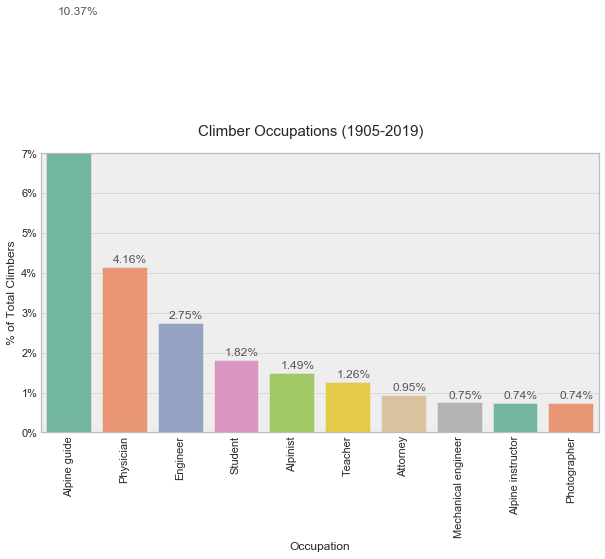

In [35]:

fig, ax = plt.subplots(figsize=(FIG.W/1.5, FIG.H))
fig.suptitle("Climber Occupations (1905-2019)", 
             fontsize=FIG.TITLE_FONT_SIZE)
fig.subplots_adjust(top=FIG.TITLE_LINESPACE)

sns.barplot(x="Occupation", y="Percentage", data=df.head(10),
            palette=sns.color_palette("Set2"))

ax.set_xlabel("Occupation", fontsize=FIG.FONT_SIZE)
ax.set_ylabel("% of Total Climbers", fontsize=FIG.FONT_SIZE)
ax.set_ylim(0, 7)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_yticklabels(["0%", "1%", "2%", "3%", "4%", "5%", "6%", "7%"])
for i, v in enumerate(df.head(10)["Percentage"].to_list()):
    ax.text(i - 0.2, v + 0.1, str(v) + "%", color="#555555")

#### What percentage are female?

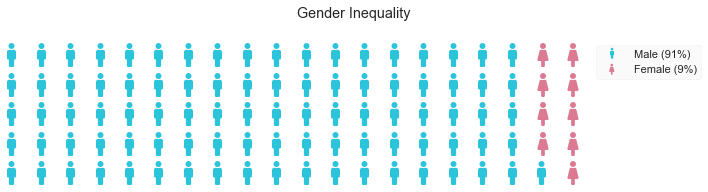

In [36]:
df = mem_df.loc[(mem_df.calcage > 0), ["sex", "lname"]]

df = df.groupby(["sex"]).count()["lname"]
df = df / sum(df) * 100
df = round(df / sum(df) * 100).astype("int")

data = {"Male": df.loc["M",], 
        "Female": df.loc["F",]}

fig = plt.figure(
        FigureClass=Waffle, 
        rows=5, 
        values=data, 
        colors=("#2bc4db", "#db7a92"),
        legend={"loc": "upper left", "bbox_to_anchor": (1, 1), 
                "framealpha": 0.25, "handletextpad": 1},
        labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
        icons=["male", "female"],
        icon_size=24,
        font_size=12, 
        figsize=(10, 3),
        icon_legend=True
    )

fig.suptitle("Gender Inequality")
fig.subplots_adjust(top=0.93)

pass

#### How does the number of female climbers increased over time?

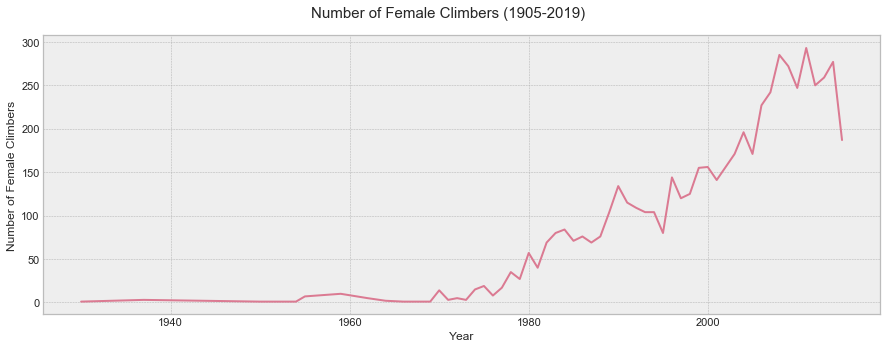

In [38]:
df = mem_df.loc[(mem_df.calcage > 0) & (mem_df.sex == "F"), ["lname", "myear"]]
df = df.groupby("myear").count()

fig, ax = plt.subplots(figsize=(FIG.W, FIG.H))
fig.suptitle("Number of Female Climbers (1905-2019)", 
             fontsize=FIG.TITLE_FONT_SIZE)
fig.subplots_adjust(top=FIG.TITLE_LINESPACE)

sns.lineplot(x=df.index, y="lname",
             ax=ax, data=df,
             markers=True, dashes=False, color="#db7a92")

ax.set_xlabel("Year", fontsize=FIG.FONT_SIZE)
ax.set_ylabel("Number of Female Climbers", fontsize=FIG.FONT_SIZE)
pass

#### What is the age distribution by gender?

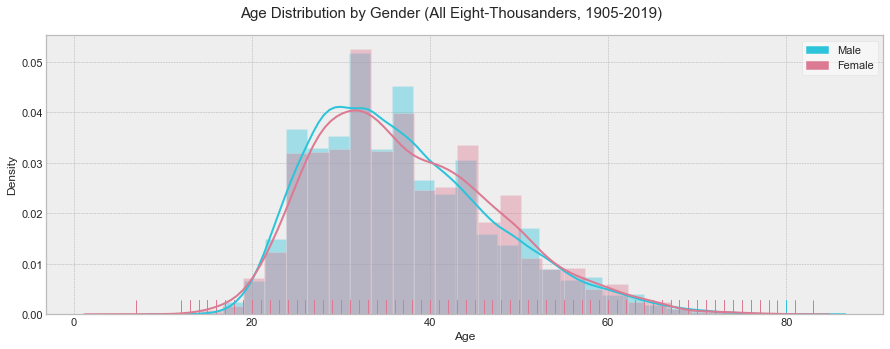

In [39]:
df = mem_df.loc[(mem_df.calcage > 0), ["sex", "calcage", "peakid", "lname"]]

fig, ax = plt.subplots(figsize=(FIG.W, FIG.H))
fig.suptitle("Age Distribution by Gender (All Eight-Thousanders, 1905-2019)", 
             fontsize=FIG.TITLE_FONT_SIZE)
fig.subplots_adjust(top=FIG.TITLE_LINESPACE)

sns.distplot(df.loc[df.sex=="M", "calcage"], 
             norm_hist=True, color="#2bc4db", rug=True, bins=30)
sns.distplot(df.loc[df.sex=="F", "calcage"], 
             norm_hist=True, color="#db7a92", rug=True, bins=30)

ax.set_ylabel("Density", fontsize=FIG.FONT_SIZE)
ax.set_xlabel("Age", fontsize=FIG.FONT_SIZE)

green_patch = matplotlib.patches.Patch(color="#2bc4db", label="Male")
red_patch = matplotlib.patches.Patch(color="#db7a92", label="Female")
ax.legend(handles=[green_patch, red_patch], facecolor="white", edgecolor="#cccccc", framealpha=0.5, fancybox=True)

pass

#### Who is the Oldest and the youngest climbers to successfully ascend?

In [41]:
df = mem_df.loc[(mem_df.calcage > 0) & 
                       (mem_df.msmtbid == 5), 
                       ["fname", "lname", "calcage", "citizen", "myear", "peakid"]]

df.columns = ["First Name", "Last Name", "Age", "Citizen", "Year", "Peak"]
oldest_df = df.sort_values(by="Age", ascending=False).head(5).reset_index()
youngest_df = df.sort_values(by="Age", ascending=True).head(5).reset_index()

print("\nYoungest Successful Ascenders:")
display(youngest_df)
print("\nOldest Successful Ascenders:")
display(oldest_df)


Youngest Successful Ascenders:


,index,First Name,Last Name,Age,Citizen,Year,Peak
0,48639,Abel,Minelli,13,France,2009,KAGA
1,54393,Jordan,Romero,13,USA,2010,EVER
2,62005,Malavath,Poorna,13,India,2014,EVER
3,33822,Mingkipa,Sherpa,15,Nepal,2003,EVER
4,8184,Sabine,Madoux,15,France,1990,DHAM



Oldest Successful Ascenders:


,index,First Name,Last Name,Age,Citizen,Year,Peak
0,59267,Yuichiro,Miura,80,Japan,2013,EVER
1,61035,Takashi,Saito,78,Japan,2013,URMA
2,64926,Tadaomi,Miwatari,76,Japan,2015,ANN4
3,45525,Min Bahadur,Sherchan,76,Nepal,2008,EVER
4,22308,Piero,Ghiglione,75,Italy,1958,IMJA


### Conclusions

Europe has the highest number of eight-thousander climbers given its long history in mountaineering. Most climbers come from developed countries including Japan, Korea, and the US.


Nepal has the highest climber population because of the Sherpa mountaineers hired by the expedition teams. It is widely believed that most expeditions would otherwise not even be possible without the help of Sherpas.

Most mountaineers drawn to the eight-thousanders are, in fact, not professional climbers. Physicians predictably top the list because all expeditions require at least one physician to accompany the teams. The high number of alpine guides can also be explained by the experienced guides and Sharpas hired by the expedition teams.
The engineers and students that show up as the top occupations for both Mount Everest and other eight-thousanders. Students can be comprehended by the fact that climbing eight-thousanders require the top-notch physical conditions possessed by young people. Yet the appearance of engineers could be attributed spare cash and time.

Mountaineering has historically been dominated by men: Only 1 out of 10 climbers were female between 1905 and 2019. However, there has been a rapid growth of female climbers since 1980 with identical age distributions between male and female climbers, further demonstrating that climbing ability varies by age, not by gender. In fact, the youngest climber to ascend Mount Everest is a female climber

#### Age Is a Problem, Says Who?
The average age of climbers to the eight-thousanders has been increasing steadily since 1980. The trend is almost identical between Mount Everest and the other 15 eight-thousanders. Age is definitely not stopping mountaineers from venturing into the death zone. Don't let age stop you!